In [2]:
import sklearn 
from sklearn.model_selection import train_test_split #Train / test split
from sklearn import preprocessing #Preprocessing of data 
from sklearn.preprocessing import StandardScaler #Scaler 
from sklearn.neighbors import KNeighborsClassifier #Model
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd 
from sklearn.model_selection import cross_val_score #Cross-validation
from sklearn.metrics import confusion_matrix #Metrics 
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from mpl_toolkits.mplot3d import Axes3D 


In [3]:
#CSV read 
nRowsRead = None #Number of lines the dataframe reads. In case of wanting you read certain lines, write number. If not, 'None'. 
df = pd.read_csv("C:/Users/aleja/OneDrive/Documents/4rt LENGUAS APLICADAS/TFG/MODELS/dataframe_def.csv", delimiter=',', nrows = nRowsRead)
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns') 


There are 3644 rows and 197 columns


In [4]:
#Balancing data 
NDys_df= df[df['Dyslexia']==0] #3252 samples with 196 features
Dys_df= df[df['Dyslexia']==1] #392 samples with 196 features
dys_tot, _ = Dys_df.shape
N_NDys= NDys_df.sample(dys_tot, random_state=10)
df_balanced= pd.merge(N_NDys, Dys_df, how='outer')
df_balanced

,Gender,Nativelang,Otherlang,Age,Clicks1,Hits1,Misses1,Score1,Accuracy1,Missrate1,...,Score31,Accuracy31,Missrate31,Clicks32,Hits32,Misses32,Score32,Accuracy32,Missrate32,Dyslexia
0,0,1,1,15,2,1,1,1,0.5,0.5,...,4,0.114286,0.000000,26,3,1,3,0.115385,0.038462,0
1,1,0,1,10,0,0,0,0,0.0,0.0,...,8,0.114286,0.000000,17,2,2,4,0.117647,0.117647,0
2,1,0,1,7,4,0,4,0,0.0,1.0,...,2,0.039216,0.039216,26,2,2,2,0.076923,0.076923,0
3,0,1,1,8,9,9,0,9,1.0,0.0,...,1,0.031250,0.031250,23,3,0,3,0.130435,0.000000,0
4,1,0,1,11,5,0,2,0,0.0,0.4,...,2,0.036364,0.054545,17,1,3,2,0.058824,0.176471,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,1,0,1,8,2,2,0,2,1.0,0.0,...,0,0.000000,0.000000,16,0,0,0,0.000000,0.000000,1
780,1,1,1,9,4,4,0,4,1.0,0.0,...,1,0.040000,0.000000,24,0,2,0,0.000000,0.080000,1
781,1,1,1,10,10,10,0,10,1.0,0.0,...,1,0.030000,0.030000,26,2,2,2,0.080000,0.080000,1
782,0,0,1,8,6,6,0,6,1.0,0.0,...,1,0.030000,0.060000,22,2,1,2,0.090000,0.050000,1


In [5]:
#Train/Test split 
y_axis= df_balanced.iloc[:,[-1]]
y= y_axis.to_numpy().flatten() #Labels (class 0 and 1)
X_axis= df_balanced.drop(y_axis.columns,axis = 1)
X= X_axis.values #Data with features 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10) #Splitting of the data 
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=10)

#Scaling/Preprocessing of data 
scaler= StandardScaler()
scaler.fit(X_train) 
X_train= scaler.transform(X_train)
print('Transformed shape:{}'.format(X_train.shape))
X_test= scaler.transform(X_test)
X_val= scaler.transform(X_val)

Transformed shape:(501, 196)


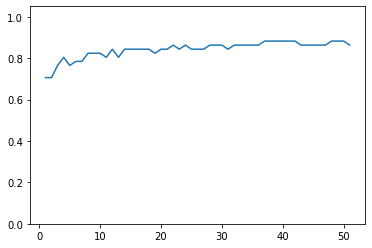

Best K:37


In [6]:
#Cross-Validation

K_list = np.round(np.linspace(start=1, stop=51, num=50)).astype(int) 
recall = np.zeros(len(K_list))

for i in range(len(K_list)): #Finds the 'best K' (or number of neighbours) based on the highest recall obtained. 
    knn = KNeighborsClassifier(n_neighbors=K_list[i], metric='euclidean', weights='distance')
    knn.fit(X_train, y_train)
    tn, fp, fn, tp = confusion_matrix(y_val, knn.predict(X_val)).ravel()
    recall[i] = float(tp) / (tp + fn)

index_max = np.argmax(recall)

knn = KNeighborsClassifier(n_neighbors=K_list[index_max], metric='euclidean', weights='distance')
knn.fit(X_train, y_train)

plt.plot(K_list, recall)
plt.ylim([0, 1.05])
plt.show()

K_opt= K_list[index_max] #Best K 
print('Best K:{}'.format(K_opt))

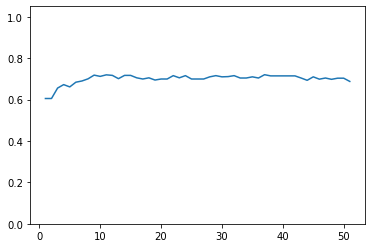

Best K for f1-score:37


In [7]:
#Cross-Validation F1 

K_list1 = np.round(np.linspace(start=1, stop=51, num=50)).astype(int) 
f1_scores = np.zeros(len(K_list1))

for i in range(len(K_list1)):
    knn = KNeighborsClassifier(n_neighbors=K_list1[i], metric='euclidean', weights='distance')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_val)
    f1_scores[i] = f1_score(y_val, y_pred)

index_max = np.argmax(f1_scores)

knn = KNeighborsClassifier(n_neighbors=K_list1[index_max], metric='euclidean', weights='distance')
knn.fit(X_train, y_train)

plt.plot(K_list1, f1_scores)
plt.ylim([0, 1.05])
plt.show()

K_opt_f = K_list1[index_max]
print('Best K for f1-score:{}'.format(K_opt_f)) #For this random seed, the best number of neighbors is the same as in the previous cross-validation, therefore, we will continue testing the model with this number.

In [8]:
#Metrics of model

y_pred= knn.predict(X_test)
cm= confusion_matrix(y_pred,y_test)
tn, fp, fn, tp = cm.ravel()
recall= float(tp) / (tp + fn)
report= classification_report(y_test, knn.predict(X_test))
print(report)
print(cm)
print('Recall:{}'.format(recall))
print('f1 score:{}'.format(f1_score(y_pred, y_test)))

              precision    recall  f1-score   support

           0       0.89      0.62      0.73        78
           1       0.71      0.92      0.80        79

    accuracy                           0.77       157
   macro avg       0.80      0.77      0.76       157
weighted avg       0.80      0.77      0.76       157

[[48  6]
 [30 73]]
Recall:0.7087378640776699
f1 score:0.8021978021978021


In [9]:
#Validation of final model 
from sklearn.model_selection import KFold
kf = KFold(n_splits=10, shuffle=True)
scores = [] 
for train_idx, val_idx in kf.split(X):
    X_train_k, y_train_k = X[train_idx], y[train_idx]
    X_val_k, y_val_k = X[val_idx], y[val_idx]
    knn= KNeighborsClassifier(n_neighbors=K_list[index_max], metric='euclidean', weights='distance')
    knn.fit(X_train_k, y_train_k)
    y_pred_k= knn.predict(X_val_k)
    cm= confusion_matrix(y_val_k, y_pred_k)
    tn, fp, fn, tp = confusion_matrix(y_val_k, y_pred_k).ravel()
    recall= float(tp) / (tp + fn)
    scores.append(recall)

print('Recall mean:{}'.format(np.mean(scores))) #Mean of the Recall values obtained

Recall mean:0.7657200528907702


In [10]:
#Final model 
knn= KNeighborsClassifier(n_neighbors=K_list[index_max], metric='euclidean', weights='distance')
knn.fit(X_train, y_train)
y_pred= knn.predict(X_test)
cm= confusion_matrix(y_test, y_pred)
print(cm)
tn, fp, fn, tp = cm.ravel()
recall= float(tp)/ (tp + fn)
f1score = f1_score(y_pred, y_test)
print('Recall:{}'.format(recall))
print('f1 score:{}'.format(f1score))

[[48 30]
 [ 6 73]]
Recall:0.9240506329113924
f1 score:0.8021978021978021


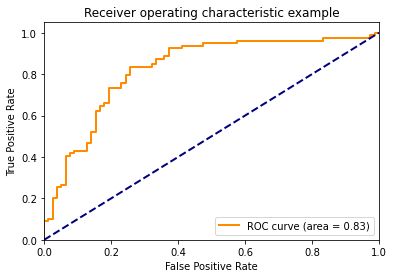

In [11]:
#ROC curve
y_score= knn.predict_proba(X_test)[:, 1].astype('float')
fpr, tpr, _ = roc_curve(y_test, y_score, drop_intermediate=True)
roc_auc = auc(fpr, tpr)

#Graphics
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.savefig('recall_knn.png')
plt.show()

In [ ]:
#dict= {'y_score': y_score, 'y_test': y_test}
#df_o= pd.DataFrame.from_dict(dict)
#df_o.to_csv('knn_results_2.csv')